# Exploratory Data Analysis
01/23/2024 Yunfei Wang

## Project Overview
This study aims to explore how feminist professional communities co-evolve together. Specifically, I retrived top 14 "Women in XXX" communities on Chinese social media Douban, and plan to explore the sentiment and topic distribution change from 2019 to 2023. Basic info (before cleaning) about the 14 communities are listed below.

| GROUP | MEMBER | POST |
| --- | --- | --- |
| Women in Tech | 80192 | 13386 |
| Women in Law | 65583 | 9715 |
| Women in Academia | 39089 | 5571 |
| Women in Finance | 29120 | 4940 |
| Women in Biotech/Pharma | 17766 | 4668 |
| Women in Social Science | 40605 | 3768 |
| Women in Architecture | 10560 | 1325 |
| Women in Art | 11712 | 1056 |
| Women in Work | 23548 | 712 |
| Women in Legal Profession | 7380 | 642 |
| Women in Learning | 14669 | 616 |
| Women in ENTR | 7839 | 463 |
| Women in FilmTV | 7480 | 372 |
| Women in STEM | 7671 | 364 |

**Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import nltk
import jieba
import spacy
# load english language mode
nlp = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Academia = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-13-13-35-21-303165551212861-Women in Academia 女性在学术界小组-采集的数据-后羿采集器.xlsx')
Tech = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-14-17-47-17-404679584804527-Women In Tech 女性科技从业者集合地小组-采集的数据-后羿采集器.xlsx')
Law = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-15-11-10-37-467278612404137-Women in Law 女性律师互助组小组-采集的数据-后羿采集器.xlsx')
SocialScience = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-15-23-28-39-511560680680392-Women in Social Science小组-采集的数据-后羿采集器.xlsx')
Finance = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-16-8-18-43-543363525339649-Women in Finance 金融行业女性小组-采集的数据-后羿采集器.xlsx')
Work = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-16-9-53-49-549069591420480-豆瓣 - Women in Work-后羿采集器.xlsx')
Art = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-19-11-39-24-161805604372591-women in art 女性艺术从业者小组-采集的数据-后羿采集器.xlsx')
Biotech = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-19-7-36-5-148643134051084-Women in BiotechPharma医药行业女性小组-采集的数据-后羿采集器.xlsx')
Learning = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-19-9-0-32-153710738345612-httpswww.douban.comgroupWomeninLearningdiscussionstart=0&type=new-采集的数据-后羿采集器.xlsx')
Architecture = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-21-14-49-37-1555755403559-Women In Architecture建筑从业者大本营小组-采集的数据-后羿采集器.xlsx')
Film = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-21-15-29-45-1796585640469-Women in FilmTV 女性影视从业者小组-采集的数据-后羿采集器.xlsx')
RNTR = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-21-16-32-48-21747665172411-Women In ENTR 创业女性小组-采集的数据-后羿采集器.xlsx')
STEM = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-21-17-20-48-24627668103299-Women In STEM理科女生集合地小组-采集的数据-后羿采集器.xlsx')
Legal = pd.read_excel('/content/drive/MyDrive/DBCommunity/2024-1-21-23-7-38-45437559620809-豆瓣 - 登录跳转页-采集的数据-后羿采集器.xlsx')

## Data Overview

In [ ]:
Academia[:10]

,讨论,讨论链接,作者,回应,最后回应,发布时间,字段1,字段2,字段3,字段4
0,讨论,NaN,作者,回应,最后回应,NaN,NaN,NaN,NaN,NaN
1,精华\n\n\n \n ...,https://www.douban.com/group/topic/196580000/,Anon加重音,1115,2023-12-21,2020-10-09 08:25:49,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,270.0,413.0,44.0
2,精华\n\n\n \n ...,https://www.douban.com/group/topic/197236156/,Anon加重音,64,2023-12-01,2020-10-14 12:38:45,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,12.0,28.0,1.0
3,精华\n\n\n \n ...,https://www.douban.com/group/topic/196808485/,Anon加重音,12,2023-07-04,2020-10-10 22:01:03,前情(意见征集贴) https://www.douban.com/group/topic/1...,49.0,64.0,4.0
4,精华\n\n\n \n ...,https://www.douban.com/group/topic/199532790/,Sophie,2,2023-05-03,2020-11-02 04:35:37,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,13.0,6.0,NaN
5,精华\n\n\n \n ...,https://www.douban.com/group/topic/203981724/,丸子,6,2023-03-25,2020-12-09 03:43:55,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,27.0,293.0,15.0
6,精华\n\n\n \n ...,https://www.douban.com/group/topic/202706759/,丸子,15,2022-12-09,2020-11-28 08:53:06,以下表格列出的情况只与组规中判定为“伸手党”一项有关，其他组规中规定的禁止项内容将直接删除。...,23.0,5.0,NaN
7,精华\n\n\n \n ...,https://www.douban.com/group/topic/194830088/,doe,54,2022-06-21,2020-09-23 10:49:44,12.10 将本贴的内容整理为豆列，以方便大家查看：https://www.douban.c...,557.0,5454.0,481.0
8,精华\n\n\n \n ...,https://www.douban.com/group/topic/201113142/,your chance,20,2021-09-13,2020-11-14 20:42:09,前言：感谢各位组员的热心分享和疑惑解答，小组的一切一切都是承蒙各位的慷慨和热心，谢谢大家也希...,131.0,1422.0,82.0
9,精华\n\n\n \n ...,https://www.douban.com/group/topic/195064597/,Anon加重音,30,2021-05-11,2020-09-25 07:33:29,入组申请回答以下三个问题：本帖中找到的由14个汉字组成的暗号入组理由 (一两句话即可)你入组...,444.0,531.0,115.0


In [ ]:
df_dict = {"Academia": Academia, "Tech": Tech, "Law": Law,
           "SocialScience": SocialScience, "Finance": Finance, "Work": Work,
           "Art": Art, "Biotech": Biotech, "Learning": Learning,
           "Architecture": Architecture, "Film": Film, "RNTR": RNTR,
           "STEM": STEM, "Legal": Legal}

for v in df_dict.values():
  print(v.shape)

(5571, 10)
(13386, 10)
(9715, 10)
(3768, 10)
(4940, 10)
(712, 10)
(1056, 10)
(4668, 10)
(616, 10)
(1325, 10)
(372, 10)
(463, 10)
(364, 10)
(642, 10)


## Data Cleaning

In [ ]:
def str_to_int(t):
  list_of_int = re.findall(r'[0-9]', str(t))
  if not list_of_int:
    return 0
  return int(list_of_int[0])

def float_to_int(f):
  if f is None:
    return 0
  return int(f)

Since the data retrieved from different groups are slightly different in format, the preprocessing should be conducted separately before combining them together.

In [ ]:
def preprocessing(df_raw, community_name):
  '''
  Clean the data in each group
  '''
  # change the column name
  df = df_raw[["讨论", "字段1", "作者", "回应", "最后回应", "发布时间", "字段2", "字段3", "字段4"]]
  df.rename(columns={"讨论":"Title", "字段1":"Text", "作者":"Author",
                     "最后回应":"LastReply", "发布时间":"PublishTime",
                     "回应":"Reply", "字段2":"Like", "字段3":"Collect",
                     "字段4":"Repost"}, inplace=True)

  # eliminate missing value
  df.dropna(subset=['Text'], inplace=True)

  # unify the format
  if type(df['Like']) != np.float:
    df['Like'] = df['Like'].apply(lambda x: str_to_int(x))
  df['Like'] = df['Like'].apply(lambda x: float_to_int(x))

  if type(df['Collect']) != np.float:
    df['Collect'] = df['Collect'].apply(lambda x: str_to_int(x))
  df['Collect'] = df['Collect'].apply(lambda x: float_to_int(x))

  if type(df['Repost']) != np.float:
    df['Repost'] = df['Repost'].apply(lambda x: str_to_int(x))
  df['Repost'] = df['Repost'].apply(lambda x: float_to_int(x))

  df['Reply'] = df['Reply'].fillna(0)

  df['Community_name'] = community_name

  return df

In [ ]:
for k, v in df_dict.items():
  df_dict[k] = preprocessing(v, k)

In [ ]:
df_dict['Academia'][:5]

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name
1,精华\n\n\n \n ...,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1115,2023-12-21,2020-10-09 08:25:49,2,4,4,Academia
2,精华\n\n\n \n ...,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,64,2023-12-01,2020-10-14 12:38:45,1,2,1,Academia
3,精华\n\n\n \n ...,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,12,2023-07-04,2020-10-10 22:01:03,4,6,4,Academia
4,精华\n\n\n \n ...,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2023-05-03,2020-11-02 04:35:37,1,6,0,Academia
5,精华\n\n\n \n ...,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,6,2023-03-25,2020-12-09 03:43:55,2,2,1,Academia


In [ ]:
df_dict['Art'][:5]

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name
1,Ual博士四年级学姐一枚，可接受25fall艺术类博士申请(24fall...,(25fall开始接预定比心各位。)第一次看到这个豆瓣社区，好开心。可能是看到在做艺术的女生...,mimimimiso,19,01-17 02:03,2022-09-11 01:27:30,4,9,0,Art
2,游戏式人文社科读书小组,思路参考这个https://www.douban.com/group/topic/29170...,苯奶奶banana,4,01-06 11:25,2023-12-08 13:50:26,0,0,0,Art
3,视传人想靠留学润加拿大该如何选专业,个人情况：综合大学的视传毕业，主攻插画。但是加拿大插画很多是四年制本科（比如ocad和she...,山山山,8,01-04 16:17,2023-11-02 16:39:09,0,2,0,Art
4,有没有uu在北京读书,打算1.12~1.15去北京玩儿，小时候梦校一直是央美或者北影。想趁着这次寒假的机会出去转转...,小氯,0,01-01 10:30,2024-01-01 10:30:22,0,0,0,Art
5,有没有友友在上海做当代艺术,本人国内美院研究生毕业，目前想考法国美院继续学纯艺。觉得自己一个人平时创作好困难，同学继续做...,一久别,1,2023-12-28,2023-12-21 22:09:35,0,0,0,Art


In [ ]:
# Combine the 14 dataframes together
df = pd.concat(list(df_dict.values()), axis=0)
df.shape, df.dtypes


((45341, 10),
 Title             object
 Text              object
 Author            object
 Reply             object
 LastReply         object
 PublishTime       object
 Like               int64
 Collect            int64
 Repost             int64
 Community_name    object
 dtype: object)

## Data Transformation

In [ ]:
str_col = ['Title', 'Text', 'Author']
time_col = ['LastReply', 'PublishTime']
num_col = ['Reply', 'Like', 'Collect', 'Repost']
cat_col = ['Community_name']

In [ ]:
def convert_to_date(date_str):
    if len(date_str) == 10:
        return pd.to_datetime(date_str, format='%Y-%m-%d').date()
    elif len(date_str) == 11:
        return pd.to_datetime('2024-' + date_str, format='%Y-%m-%d %H:%M').date()
    else:
        return pd.to_datetime(date_str[:10], format='%Y-%m-%d %H:%M').date()

df['LastReply'] = df['LastReply'].apply(lambda x: convert_to_date(x))
df['PublishTime'] = df['PublishTime'].apply(lambda x: convert_to_date(x))

df['LastReply'][:5], df['PublishTime'][:5]

(1    2023-12-21
 2    2023-12-01
 3    2023-07-04
 4    2023-05-03
 5    2023-03-25
 Name: LastReply, dtype: object,
 1    2020-10-09
 2    2020-10-14
 3    2020-10-10
 4    2020-11-02
 5    2020-12-09
 Name: PublishTime, dtype: object)

In [ ]:
df[str_col+time_col] = df[str_col+time_col].astype(str)
df['PublishTime'] = pd.to_datetime(df['PublishTime'])
df['LastReply'] = pd.to_datetime(df['LastReply'])
df[num_col] = df[num_col].astype(int)
df[cat_col] = df[cat_col].astype('category')

In [ ]:
df.dtypes

Title                     object
Text                      object
Author                    object
Reply                      int64
LastReply         datetime64[ns]
PublishTime       datetime64[ns]
Like                       int64
Collect                    int64
Repost                     int64
Community_name          category
dtype: object

In [ ]:
df[:5]

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name
1,精华\n\n\n \n ...,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1115,2023-12-21,2020-10-09,2,4,4,Academia
2,精华\n\n\n \n ...,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,64,2023-12-01,2020-10-14,1,2,1,Academia
3,精华\n\n\n \n ...,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,12,2023-07-04,2020-10-10,4,6,4,Academia
4,精华\n\n\n \n ...,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2023-05-03,2020-11-02,1,6,0,Academia
5,精华\n\n\n \n ...,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,6,2023-03-25,2020-12-09,2,2,1,Academia


In [ ]:
df['Community_name'].value_counts()

Tech             12715
Law               9354
Academia          5254
Finance           4759
Biotech           4457
SocialScience     3599
Architecture      1258
Art                986
Work               661
Legal              615
Learning           584
RNTR               429
Film               349
STEM               321
Name: Community_name, dtype: int64

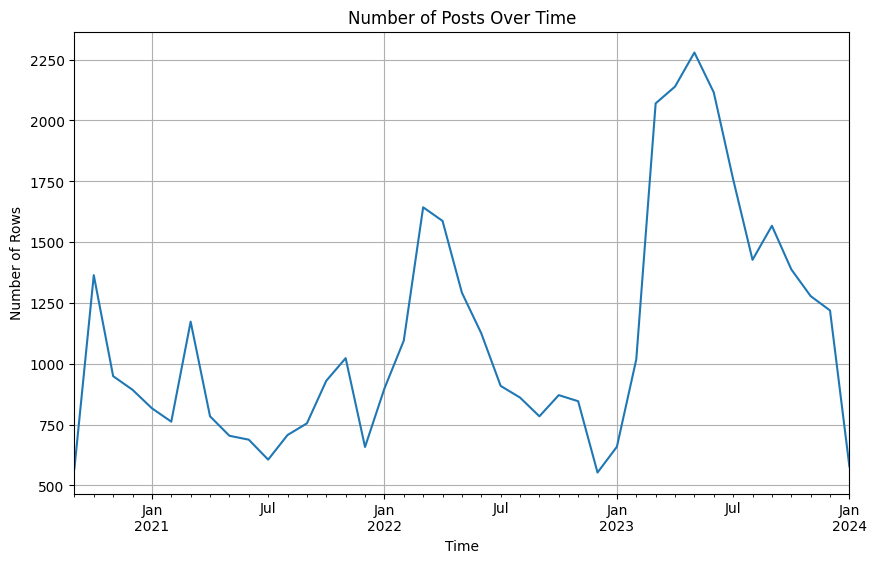

In [ ]:
# Group by the desired time period and count the rows.
time_series = df.groupby(pd.Grouper(key='PublishTime', freq='M')).size()

# Plotting the time series
plt.figure(figsize=(10, 6))
time_series.plot(kind='line')
plt.title('Number of Posts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rows')
plt.grid(True)
plt.show()

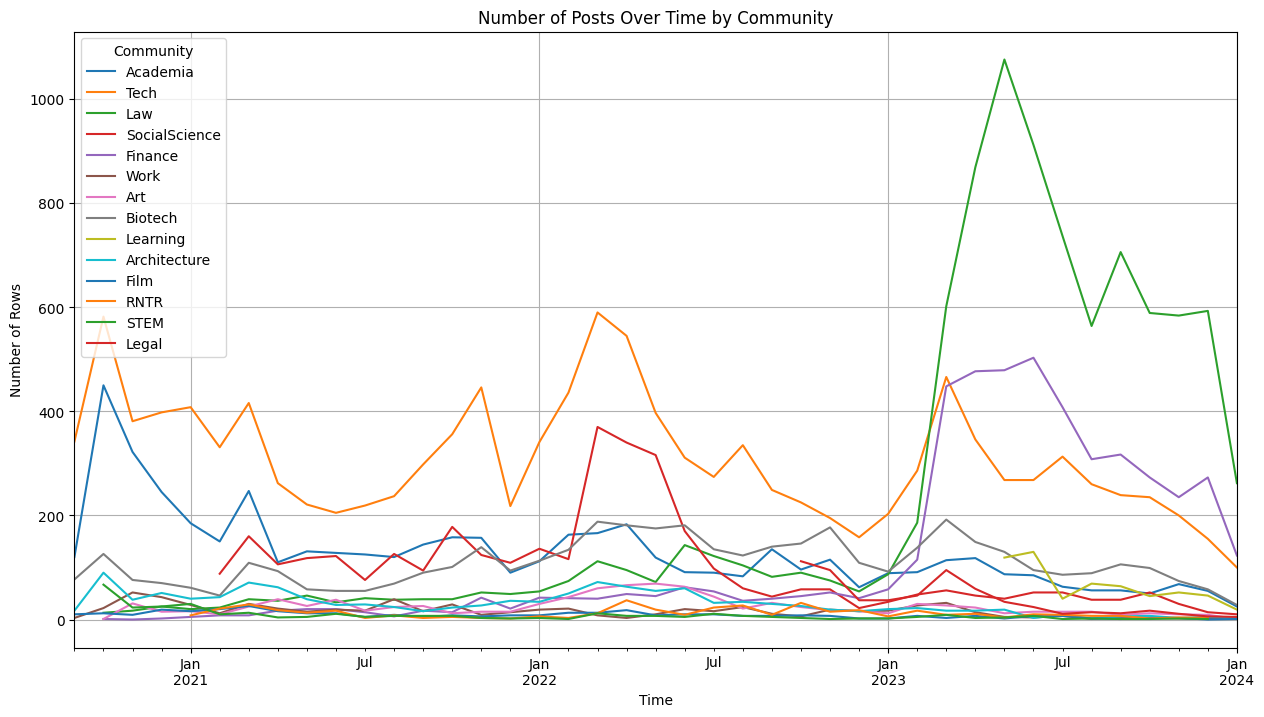

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the frequency for time grouping, e.g., 'D' for daily, 'M' for monthly, 'Y' for yearly, etc.
freq = 'M'

# Create a figure and axis for the plot
plt.figure(figsize=(15, 8))

# Iterate over each unique community
for community in df['Community_name'].unique():
    # Filter the DataFrame for the current community
    community_df = df[df['Community_name'] == community]

    # Group by time period and count the rows
    time_series = community_df.groupby(pd.Grouper(key='PublishTime', freq=freq)).size()

    # Plot the time series
    time_series.plot(kind='line', label=community)

# Customize the plot
plt.title('Number of Posts Over Time by Community')
plt.xlabel('Time')
plt.ylabel('Number of Rows')
plt.legend(title='Community')
plt.grid(True)

# Show the plot
plt.show()

From the illustrations above, we can see there's several bursts from 2021 to 2023. Heated discussions among groups are simultaneous.

In [ ]:
null_sum = df.isnull().sum()
null_sum

Title             0
Text              0
Author            0
Reply             0
LastReply         0
PublishTime       0
Like              0
Collect           0
Repost            0
Community_name    0
dtype: int64

### Text Transformation

In [ ]:
# import Chinese stopwords
with open("/content/drive/MyDrive/DBCommunity/my_stopwords.txt") as file:
    cn_stopwords = [line.rstrip() for line in file]

cn_stopwords.extend(["…", ":", "\n", ' '])
cn_stopwords[:10]

['里', '是', '有', '想', '很', '出', '做', '不', '日', '月']

In [ ]:
def elim_cn_stopwords(list):
  new_list = []
  for word in list:
    if word not in cn_stopwords:
      new_list.append(word)
  return new_list

In [ ]:
# tokenization
df['tokenized_text'] = df['Text'].apply(lambda x: list(jieba.cut(x.strip())))
df['tokenized_text'][:5]

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.686 seconds.
DEBUG:jieba:Loading model cost 1.686 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


0    [由, 猴面包树, 组员, 倡议, ，, 我们, 小组, 建立, 官方, slack, 交流...
1    [—, —, —, —, —, —, —, —, —, 本帖, 为, 问卷调查, 、, 招募...
2    [前, 情, (, 意见, 征集, 贴, ),  , https, :, /, /, www...
3    [论坛, 第二期, 分享, 会, 她, 说, PhD, ：, 不同, 的, 人生, 路径, ...
4    [09, /, 30, /, 21, 更新, :,  , 管理员, 实在, 是, 没有, 能...
Name: tokenized_text, dtype: object

In [ ]:
# normalization
df['normalized_text'] = df['tokenized_text'].apply(lambda x: elim_cn_stopwords(x))
df['normalized_text'][:5]

0    [猴面包树, 组员, 倡议, 小组, 建立, 官方, slack, 交流, 群, 营造, 更...
1    [本帖, 问卷调查, 招募, 研究, 对象, 贴, 姐妹, 问卷调查, 帮忙, 填写, 招募...
2    [前, 情, 意见, 征集, 贴, https, www, douban, group, t...
3    [论坛, 第二期, 分享, 会, 说, PhD, 人生, 路径, 文字, 稿, 音频, 分享...
4    [09, 30, 21, 更新, 管理员, 实在, 能力, 追踪, 申请, 相关, 帖子, ...
Name: normalized_text, dtype: object

In [ ]:
# Segment the text (Chinese text has no spaces)
df["seg_text"] = df['normalized_text'].apply(lambda x: " ".join(x))

In [ ]:
df['seg_text'][:10]

0    猴面包树 组员 倡议 小组 建立 官方 slack 交流 群 营造 更 友好 交流 氛围 小...
1    本帖 问卷调查 招募 研究 对象 贴 姐妹 问卷调查 帮忙 填写 招募 研究 对象 私信 告...
2    前 情 意见 征集 贴 https www douban group topic 19556...
3    论坛 第二期 分享 会 说 PhD 人生 路径 文字 稿 音频 分享 非常感谢 小组长 全力...
4    09 30 21 更新 管理员 实在 能力 追踪 申请 相关 帖子 相关 帖子 想要 推荐 ...
5    表格 列出 情况 只 组规中 判定 伸手 党 一项 组规中 禁止 项 内容 删除 意见 建议...
6    12.10 贴 内容 整理 豆列 查看 https www douban doulist 1...
7    前言 感谢 组员 热心 分享 疑惑 解答 小组 一切都是 承蒙 慷慨 热心 谢谢 希望 相关...
8    入组 申请 回答 三个 本帖 找到 14 汉字 暗号 入组 理由 一两句话 即可 你入 组后...
9    秉承 小组 【 善用 组内 搜索 拒绝 伸手 党 】 优良传统 受 姐妹 小组 women ...
Name: seg_text, dtype: object

In [ ]:
# generate tokenized sentences
def normalize_cn_Tokens(word_list, extra_stop=[]):
    # We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list])

    if word_list == None:
        return None

    doc = nlp(word_list)

    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0 and w.text not in cn_stopwords:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

def sent_cn_tokenize(word_list):
    if word_list == None:
        return None

    sent = []
    sentences = []
    for word in word_list:
        if word != '。' and word != '！' and word != '!' and word != '?' and word != '.' and word != '？':
            sent.append(word)
        else:
            sentences.append(normalize_cn_Tokens(sent))
            sent = []

    return sentences

In [ ]:
df['tokenized_sentences'] = df['tokenized_text'].apply(lambda x: sent_cn_tokenize(x))
df['tokenized_sentences'][:5]

0    [[猴面包树, 组员, 倡议, 小组, 建立, 官方, slack, 交流, 群], [营造...
1    [[本帖, 问卷调查, 招募, 研究, 对象, 贴, 姐妹, 问卷调查, 帮忙, 填写, 招...
2    [[前, 情, 意见, 征集, 贴, https, www], [douban], [gro...
3    [[论坛, 第二期, 分享, 会, 说, phd, 人生, 路径, 文字, 稿, 音频, 分...
4    [[更新, 管理员, 实在, 能力, 追踪, 申请, 相关, 帖子, 相关, 帖子, 想要,...
Name: tokenized_sentences, dtype: object

## Feature Engineering

### Categorical data representation

In [ ]:
df['Community_name'].value_counts()

Tech             12715
Law               9354
Academia          5254
Finance           4759
Biotech           4457
SocialScience     3599
Architecture      1258
Art                986
Work               661
Legal              615
Learning           584
RNTR               429
Film               349
STEM               321
Name: Community_name, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['Community_name']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
pd.DataFrame(ohe.transform(df[['Community_name']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,Academia,Architecture,Art,Biotech,Film,Finance,Law,Learning,Legal,RNTR,STEM,SocialScience,Tech,Work
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Date-time representation

In [ ]:
# convert the column to DataTime type
df['LastReply'] = pd.to_datetime(df['LastReply'], infer_datetime_format=True)

# extract year/month/day or other corresponding features
df['Reply_Year'] = df['LastReply'].apply(lambda time: time.year)
df['Reply_Month'] = df['LastReply'].apply(lambda time: time.month)
df['Reply_Day'] = df['LastReply'].apply(lambda time: time.day)

df[['LastReply', 'Reply_Year', 'Reply_Month', 'Reply_Day']]

,LastReply,Reply_Year,Reply_Month,Reply_Day
1,2023-12-21,2023,12,21
2,2023-12-01,2023,12,1
3,2023-07-04,2023,7,4
4,2023-05-03,2023,5,3
5,2023-03-25,2023,3,25
...,...,...,...,...
637,2022-10-10,2022,10,10
638,2022-10-10,2022,10,10
639,2022-10-10,2022,10,10
640,2022-10-07,2022,10,7


In [ ]:
# convert the column to DataTime type
df['PublishTime'] = pd.to_datetime(df['PublishTime'], infer_datetime_format=True)

# extract year/month/day or other corresponding features
df['Pub_Year'] = df['PublishTime'].apply(lambda time: time.year)
df['Pub_Month'] = df['PublishTime'].apply(lambda time: time.month)
df['Pub_Day'] = df['PublishTime'].apply(lambda time: time.day)

df[['PublishTime', 'Pub_Year', 'Pub_Month', 'Pub_Day']]

,PublishTime,Pub_Year,Pub_Month,Pub_Day
1,2020-10-09,2020,10,9
2,2020-10-14,2020,10,14
3,2020-10-10,2020,10,10
4,2020-11-02,2020,11,2
5,2020-12-09,2020,12,9
...,...,...,...,...
637,2022-10-10,2022,10,10
638,2022-10-08,2022,10,8
639,2022-10-10,2022,10,10
640,2022-10-06,2022,10,6


### Text data representation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus_academia = df[df['Community_name'] == "Academia"]['seg_text']
combined_corpus_academia = []
for line in corpus_academia:
  combined_corpus_academia.append(line)


In [ ]:
vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words=cn_stopwords)
X = vectorizer.fit_transform(combined_corpus_academia)
X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


(5254, 8327)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '01', ..., '鼓励', '鼓舞', '鼓起勇气'], dtype=object)

In [ ]:
def get_topn_features(X, feature_names, topn=10):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []

    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})

    return pd.DataFrame(feature_freq)

In [ ]:
get_topn_features(X, feature_names, topn=10)

,feature,frequency
0,申请,4647
1,研究,3613
2,老师,3402
3,导师,3317
4,学校,3060
5,方向,2636
6,专业,2459
7,工作,2354
8,phd,2256
9,姐妹,2146


In [ ]:
def community_top_features(community_name):
  corpus = df[df['Community_name'] == community_name]['seg_text']
  combined_corpus = []
  for line in corpus:
    combined_corpus.append(line)

  vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words=cn_stopwords)
  X = vectorizer.fit_transform(combined_corpus)

  feature_names = vectorizer.get_feature_names_out()

  return get_topn_features(X, feature_names, topn=10)

In [ ]:
# make sure warnings are not printed in the next step
import warnings
warnings.filterwarnings("ignore")

In [ ]:
top10_dict = {}
for k in df_dict:
  top10_dict[k] = community_top_features(k)['feature']

pd.DataFrame(top10_dict)

,Academia,Tech,Law,SocialScience,Finance,Work,Art,Biotech,Learning,Architecture,Film,RNTR,STEM,Legal
0,申请,工作,工作,研究,实习,工作,专业,工作,学习,工作,工作,创业,专业,实习
1,研究,公司,实习,专业,工作,女性,艺术,公司,记录,建筑,影视,公司,姐妹,工作
2,老师,姐妹,律师,申请,姐妹,公司,工作,姐妹,英语,专业,电影,工作,工作,学校
3,导师,项目,团队,学校,金融,姐妹,学校,专业,风险,设计,专业,项目,方向,申请
4,学校,实习,姐妹,方向,感觉,专业,设计,方向,希望,感觉,公司,经验,数学,姐妹
5,方向,面试,面试,老师,offer,希望,姐妹,岗位,时间,公司,女性,女性,学习,律师
6,专业,学习,感觉,工作,公司,实习,喜欢,经验,内容,真的,导演,姐妹,stem,面试
7,工作,感觉,法律,社会学,券商,行业,真的,相关,资产,实习,姐妹,很多,希望,时间
8,phd,很多,法务,项目,方向,时间,感觉,感觉,打卡,转行,行业,希望,学校,老师
9,姐妹,专业,业务,相关,岗位,岗位,申请,毕业,工作,项目,希望,朋友,感觉,很多


From the top words in each corpus, a preliminary observation could be that every group has their own concentraitons, while shared topics (e.g. feminism, learning, and education) are also widely discussed.
There's a lot of emotional or subjective expressions in the list, which means the Douban communities serves not only as information sharing platform, but also spaces for emotional support exchange.

## Additional features
- top post
- length

In [ ]:
import re

In [ ]:
# What features does a top post have? To answer the question, I should first identify the top posts, whose titles contain "精华" at the beginning.
df['TopPost'] = df['Title'].apply(lambda x: bool(re.match(r'精华', str(x))))
df['TopPost'].describe()

count     45341
unique        2
top       False
freq      44172
Name: TopPost, dtype: object

In [ ]:
# calculate length
df['Length'] = df['tokenized_text'].apply(lambda x: len(x))
df['Length'][:10]

0    313
1     67
2    244
3    177
4    478
5     63
6    729
7    331
8    890
9    113
Name: Length, dtype: int64

## Save the dataset

In [ ]:
# Save the full dataset as a back-up
df.to_csv('/content/drive/MyDrive/DBCommunity/saved_data/full_data.csv', index=False)

In [ ]:
# Save a version containing only "Women in Tech" and "Women in Academia"
df1 = df[(df['Community_name'] == 'Academia') | (df['Community_name'] == 'Tech')]

In [ ]:
# Encode the community_name feature
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df1[['Community_name']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
aca = pd.DataFrame(ohe.transform(df1[['Community_name']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})
aca

,Academia,Tech
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
17964,0.0,1.0
17965,0.0,1.0
17966,0.0,1.0
17967,0.0,1.0


In [ ]:
df1['Aca'] = aca.loc[:, 'Academia']

<ipython-input-47-7e753648d994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Aca'] = aca.loc[:, 'Academia']


In [ ]:
df1.head()

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name,...,Reply_Month,Reply_Day,Pub_Year,Pub_Month,Pub_Day,normalized_text,tokenized_sentences,TopPost,Length,Aca
0,精华\n\n\n \n ...,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1115,2023-12-21,2020-10-09,2,4,4,Academia,...,12,21,2020,10,9,"[猴面包树, 组员, 倡议, 小组, 建立, 官方, slack, 交流, 群, 营造, 更...","[[猴面包树, 组员, 倡议, 小组, 建立, 官方, slack, 交流, 群], [营造...",True,313,1.0
1,精华\n\n\n \n ...,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,64,2023-12-01,2020-10-14,1,2,1,Academia,...,12,1,2020,10,14,"[本帖, 问卷调查, 招募, 研究, 对象, 贴, 姐妹, 问卷调查, 帮忙, 填写, 招募...","[[本帖, 问卷调查, 招募, 研究, 对象, 贴, 姐妹, 问卷调查, 帮忙, 填写, 招...",True,67,1.0
2,精华\n\n\n \n ...,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,12,2023-07-04,2020-10-10,4,6,4,Academia,...,7,4,2020,10,10,"[前, 情, 意见, 征集, 贴, https, www, douban, group, t...","[[前, 情, 意见, 征集, 贴, https, www], [douban], [gro...",True,244,1.0
3,精华\n\n\n \n ...,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2023-05-03,2020-11-02,1,6,0,Academia,...,5,3,2020,11,2,"[论坛, 第二期, 分享, 会, 说, PhD, 人生, 路径, 文字, 稿, 音频, 分享...","[[论坛, 第二期, 分享, 会, 说, phd, 人生, 路径, 文字, 稿, 音频, 分...",True,177,1.0
4,精华\n\n\n \n ...,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,6,2023-03-25,2020-12-09,2,2,1,Academia,...,3,25,2020,12,9,"[09, 30, 21, 更新, 管理员, 实在, 能力, 追踪, 申请, 相关, 帖子, ...","[[更新, 管理员, 实在, 能力, 追踪, 申请, 相关, 帖子, 相关, 帖子, 想要,...",True,478,1.0


In [ ]:
df.shape

(45341, 22)

In [ ]:
df1.shape

(17969, 22)

In [ ]:
df1.to_csv('/content/drive/MyDrive/DBCommunity/saved_data/tech_aca_data.csv', index=False)